##Uploading Data


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
voters = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')

##Introduction


The purpose of this project is to analyze specific trends in the voter registration over time in the United States.

The goal of this project is to identify these specific trends for both the national and state levels.

It is important for someone to read this notebook to provide insight to the government organization. Understanding these voter registration trends could improve outreach, policy decisions and preparations for the election

Research Questions:
1. How did voter registration patterns change in the months leading up to 2016 and 2020 elections across different states?
2. How did the voter registration pattern of Washington DC change from 2016 to 2020?

## 1. Data Processing

In [ ]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


-Jurisdiction is the state from which the voter registration data is collection. For example, in the first 5 rows, the jurisdiction is the state of Arizona

-Year is the election year in which the voter registration data was recorded. This dataset includes data from both 2016 and 2020 elections

-Month is the month in whehn the number of new registered voters was counted

-New registered voters is the amount of people who registered for the first time in that month within the given state



In [ ]:
voters.isnull().values.any()

False

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [ ]:
voters = voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})

Potential limitations could include how the data set is only from a few months of 2016 and 2020. This limited time frame can make if difficult to analyze long term voter registration trends/patterns

Another limitation is that these trends may not be typical due to the COVID-19 pandemic affecting voters in 2020. If there is a decrease in voters we do not know if it is from outlying causes such as the pandemic

###Exploratory Data Analysis

In [ ]:
voters.sort_values(by='registered_voters',ascending=False).head(1)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voter registration was 238281 in California in February of 2020

In [ ]:
average = voters['registered_voters'].mean()
average

48223.46226415094

The average voter registration is 48223.4622 people

In [ ]:
high_voters = voters.loc[voters.registered_voters>average]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


There were 93 times where the voter registration was higher than the average

In [ ]:
state_count = high_voters['NAME'].value_counts()
state_count

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Texas went over the national average for new voter registration 8 times, California and Florida were 7 times, North Carolina was 6 times, Illinois was 4 times, Arizona was 3 times and Georgia went over once

In [ ]:
state_average = voters.groupby('NAME')['registered_voters'].mean()
top_three = state_average.sort_values(ascending=False).head(3)
top_three

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


California, Texas and Florida had the highest average voter registration overall

##Data Visualization

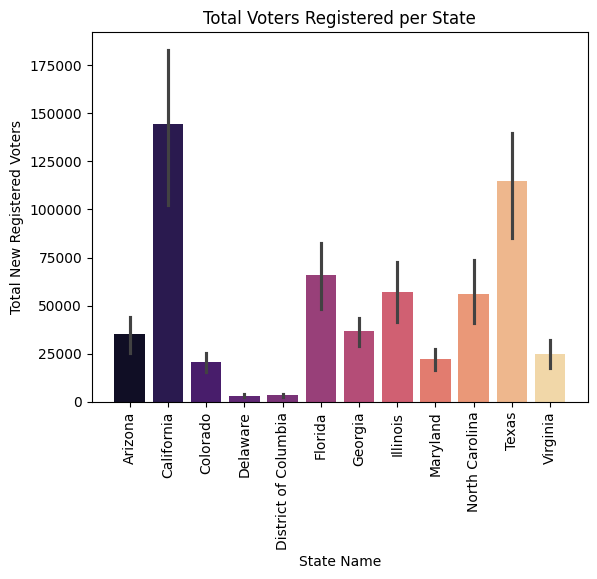

In [ ]:
sns.barplot(voters,x='NAME',y='registered_voters',hue='NAME',palette='magma')
plt.plot(figsize=(10,10))
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Total New Registered Voters')
plt.title('Total Voters Registered per State')
plt.show()

Trends seen on the bar plot:
- Bigger states such as California and Texas have a high amount of total new registered voters while smaller states such as Delaware and the District of Columbia have a low amount of total new registered voters
- The size and population of each state seems to be proportional to the amount of total new registered voters in that state

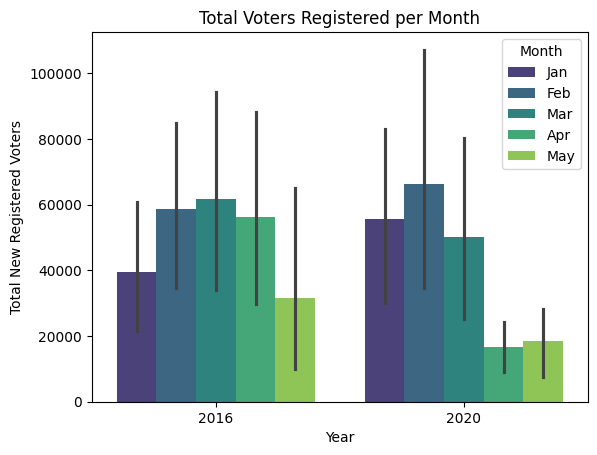

In [ ]:
sns.barplot(voters,x='Year',y='registered_voters',hue='Month',palette='viridis')
plt.xlabel('Year')
plt.ylabel('Total New Registered Voters')
plt.title('Total Voters Registered per Month')
plt.show()

Trends seen on the bar plot:
- Both years had an increased amount of voters from January to February then had a decreased amount of voters from March to April
- 2020 had a higher amount of voters in January and February than 2016 but lower amount of voters in March, April, and May than 2016

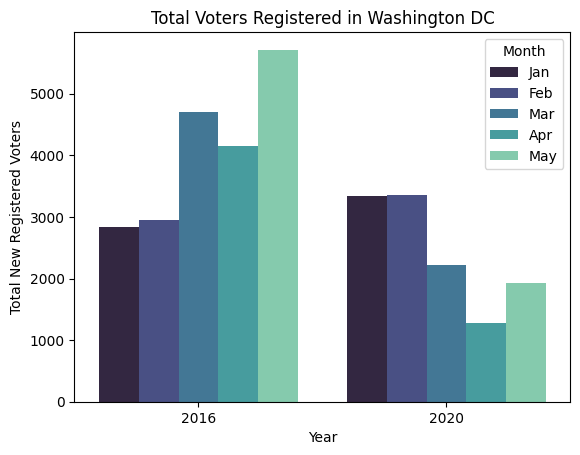

In [ ]:
#Research Question 2: How did the voter registration pattern of Washington DC change from 2016 to 2020?

district_data = voters.loc[voters['NAME']=='District of Columbia']

sns.barplot(district_data,x='Year',y='registered_voters',hue='Month',palette='mako')
plt.xlabel('Year')
plt.ylabel('Total New Registered Voters')
plt.title('Total Voters Registered in Washington DC')
plt.show()

Research Question 2: How did the voter registration pattern of Washington DC change from 2016 to 2020?

As you can see in the bar plot the amount of total new registered voters decreased greatly from 2016 to 2020. The lowest amount of voters in 2016 was almost 2954 and the highest amount of voters in 2020 was about 3348.

Another difference between these two election years is that in 2016 from January to May the overall trend was that the total amount of voters increased overtime. In 2020, from January to May the overall trend was that the total amount of voters decreased overtime.

##Mapping



In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.45 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

In [ ]:
state_average = voters.groupby('NAME')['registered_voters'].mean()
state_average

,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


In [ ]:
map_data = bbox.merge(state_average, on='NAME', how='inner')

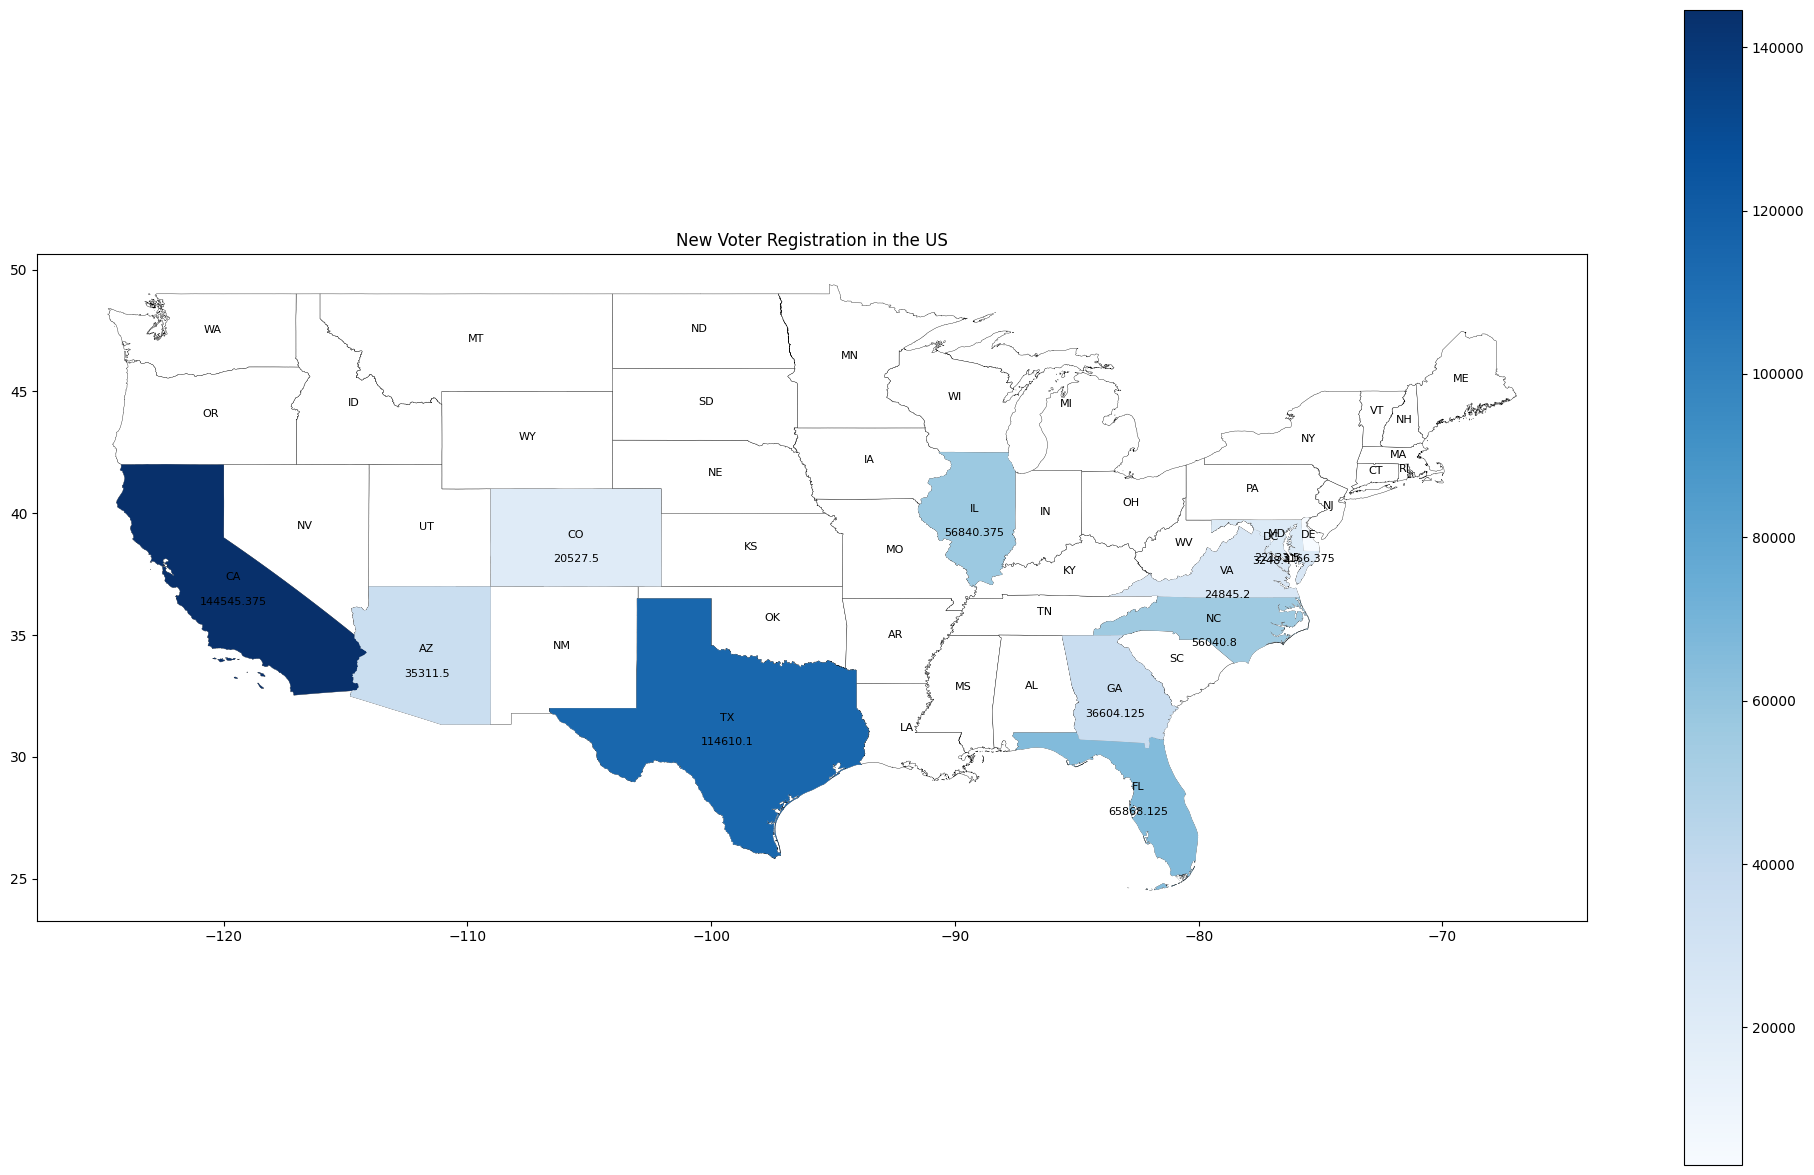

In [ ]:
fig=plt.figure(figsize=(25,15))
ax=fig.add_subplot()
bbox.plot(color="white", ax=ax, edgecolor='black', linewidth=.25)
map_data.plot(column='registered_voters',ax=ax,legend=True,cmap='Blues')
plt.title('New Voter Registration in the US')

bbox.apply(lambda x: ax.annotate(text=x.STUSPS,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=8),axis=1)
map_data.apply(lambda x: ax.annotate(text=x.registered_voters,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y-1),ha="center",fontsize=8),axis=1)

plt.show()

##Conclusion



Insights: Voter registration seemed to be at its highest in earlier months of the election years such as February and March. Voter registration was significantly lower in 2020 than in 2016. California, Texas, and North Carolina were the top three states with highest numbers of registered voters while California, Texas, and Florida had the highest average amount of voter registration overall

Suggestions: I suggest to increase online voter registration as the low numbers from 2020 could be due to the COVID-19 pandemic. Another suggestion would be to increase outreach and advertising in January and May as those months had lower registered voters. One last suggestion is to increase outreach in smaller states because even though their lower numbers could be from population, the numbers should be higher in those areas.

Possible Next Steps: If I continued to work with this project, I would analyze other election years such as 2008, 2012 and 2024 because a majority of the low registered voters of 2020 are most likely due to the COVID-19 pandemic. I would also like to analyze which party the voters registered under to see if there is a side with higher numbers. Then I would suggest for the other side to increase outreach in specific states. Demographic data such as race and gender would also help us see if there is anyone we need to increase outreach to

##Github


https://github.com/hdanzi/325-Midterm

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Name: Helena Danzi